
# Project: Investigate a  No Show Appointments Dataset

## Table of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    -[Gathering Data](#gather)
    -[Assessing Data](#assess)
    -[Cleaning Data](#clean)
- [Exploratory Data Analysis](#eda)
- [Conclusions](#conclusions)

<a id='intro'></a>
# 1. Introduction

For this project, the data set of medicls appointments will be investigated. The data set extracted from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) contains records from the public hospital in Vitoria, Brazil of patients attending their appointment or not.

This data set contains patient information, associated chronic diseases, and appointment assistance. Through the research of this data set by using the previous knowledge, we will seek to answer the questions that arise from the information.


## Questions


In the development of this analysis I will seek to answer the following questions:

1. 	Is alcoholism a prominent factor in patient's absences? 
2.	Do SMS reminders decrease the number of absences?
3.	Who in terms of age misses more appointments? 
4.	Are no-show appointments associated with a certain gender?

<a id='wrangling'></a>
# 2. Data Wrangling

<a id='gather'></a>
## 2.1 Gathering Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Load data and print out a few lines. 
df = pd.read_csv('data/noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='assess'></a>
## 2.2 Assessing data

### General properties

In [4]:
# This brings de information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* **Note**: The ScheduleDay and AppointmentDay have the incorrect type because they are dates and time.The Neighbourhood column could have the categories type to reduce the memory. The patientid column has a incorrect data type. This will be considerer in the cleaning stage

In [5]:
# Checking descriptive statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# this bring the total number of columns and rows of the dataset
df.shape

(110527, 14)

In [7]:
#this is to visualizate the names in all columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
#overall unique possible columns
for column in df.iloc[:,np.r_[0:14]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

PatientId:
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID:
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender:
['F' 'M']
ScheduledDay:
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay:
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']

In [9]:
# Verifying if there are duplicates values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Missing and duplicate Data

In [10]:
# checking for missing values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# Checking duplicates values in general
sum(df.duplicated())

0

I must check that there are no duplicate values in the `AppointmentID` column that this value must be unique

In [12]:
# Checking duplictes values in Appointments_ID
sum(df.AppointmentID.duplicated())

0

### Incorrect values in dataset

As a first step, the consistency and validity of the data must be verified

In [13]:
# Checking correct values in PatientID column
df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [14]:
# Checking correct values in AppointmentID column
df[df.AppointmentID <= 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [15]:
# Checking correct values in Gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [16]:
# Checking correct values in ScheduleDay column
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [17]:
# Checking correct values in AppointmentDay column
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

* **Note**: The AppointmentDay column has the time portion is set to zero.This will be considerer in the cleaning stage

In [18]:
# Checking correct values in Age column
df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [19]:
df[df.Age == 0].count()

PatientId         3539
AppointmentID     3539
Gender            3539
ScheduledDay      3539
AppointmentDay    3539
Age               3539
Neighbourhood     3539
Scholarship       3539
Hipertension      3539
Diabetes          3539
Alcoholism        3539
Handcap           3539
SMS_received      3539
No-show           3539
dtype: int64

* **Note**: There are Age values that are equal to -1 and 3539 records with 0 value.This will be considerer in the cleaning stage

In [20]:
df['Neighbourhood'].nunique()

81

In [21]:
# Checking correct values in Scholarship column
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [22]:
# Checking correct values in Hipertension column
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [23]:
# Checking correct values in Diabetes column
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [24]:
# Checking correct values in Alcoholism column
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [25]:
# Checking correct values in Handcap column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [26]:
# Checking correct values in Age column
df[df.Handcap > 1]['Handcap'].sum()

417

* **Note**: The Hancap Column have 1,2,3,4,5 values instead 1,0 and the header it´s wrong This will be considerer in the cleaning stage

In [27]:
# Checking correct values in No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

<a id='clean'></a>
## 2.3 Cleaning Data

First, I made copy of the dataframe and change the name of all columns for iniciate the cleaning process

Then I start to correct the issues founded:

* The Hancap, Hipertension, no-show columns header is misspelled
* Incorrect data type: The ScheduleDay and AppointmentDay columns have the incorrect type because they are dates and time. No-Show have a incorrect type. The Neighbourhood column could have the categories type to reduce the memory. The patientid column has a incorrect data type.
* The AppointmentDay column has the time portion is set to zero.
* There are age values that are equal to -1 and 3539 records with 0 value 
* The Hancap Column have 1,2,3,4,5 values instead 1,0. 

#### * Creating a copy 

In [28]:
# Creating a copy of dataframe to cleaning process
df_clean = df.copy()

#### * Change the name of all columns 

In [29]:
# Changing column's label
df_clean.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### * The Hancap, Hipertension, no-show columns header is misspelled

In [30]:
# The Hancap, Hipertension, no-show columns header is misspelled. And in the case of the no_show column, the label does not 
# make the content clear
df_clean.rename({'hipertension':'hypertension','handcap':'handicap','no-show':'show'},axis=1,inplace=True)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### * Incorrect data type
> Scheduledday and Appointementday

In [31]:
#Convert date time columns to correctly type
df_clean[['scheduledday','appointmentday']] = df_clean[['scheduledday','appointmentday']].astype('datetime64[ns]')
df_clean.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
show                      object
dtype: object

> No Show data

In [32]:
# Correcting No-show data, assuming that it does "No" correspond to the patient who attends and "Yes" it corresponds that
# the patient does not attend
df_clean['show'].replace({'No':'Yes','Yes':'No'},inplace=True)
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


In [33]:
# Percentage of total attendance at medical appointment
perc_tot = df_clean['show'].value_counts(normalize=True) * 100
perc_tot

Yes    79.806744
No     20.193256
Name: show, dtype: float64

> Neighbourhood

In [34]:
# Changing data type of Neighbourhood column
df_clean['neighbourhood'] = df_clean['neighbourhood'].astype('category')
df_clean.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood           category
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
show                      object
dtype: object

> PatientId

In [35]:
# Correcting data type of patientid colum
df_clean['patientid'] = df_clean['patientid'].astype('int64')
df_clean.dtypes

patientid                  int64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood           category
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
show                      object
dtype: object

#### * The AppointmentDay column has the time portion is set to zero. 

In [36]:
# Changing data type of ScheduledDay and AppointmentDay columns
# Appointment Date
df_clean['appointmentday'] = pd.to_datetime(df_clean['appointmentday']).dt.date.astype('datetime64[ns]')

# Appointment Booking Date
df_clean['scheduledday'] = pd.to_datetime(df_clean['scheduledday']).dt.date.astype('datetime64[ns]')
df_clean.dtypes

patientid                  int64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood           category
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
show                      object
dtype: object

In [37]:
df_clean.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


#### * There are age values that are equal to -1 and 3539 records with 0 value.

> Dropping Age < 0

In [38]:
#Identifying the record with Age= -1
inc_age= df.loc[df_clean['age']<0]
inc_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [39]:
# Droppin the record of faulty data
df_clean.drop(inc_age.index, axis=0, inplace=True)

In [40]:
# checking the drop
df_clean.loc[df_clean['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


In [41]:
df_clean.shape

(110526, 14)

> Dropping Age = 0

In [42]:
# Percentage of Age = 0
len(df_clean.query('age == 0'))/len(df_clean) * 100

3.201961529413894

In [43]:
#Identifying the record with Age= 0
exc_age = df_clean.loc[df_clean['age']== 0 ]
exc_age.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
59,71844284745331,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,Yes


In [44]:
# Droppin the record of faulty data
df_clean.drop(exc_age.index, axis=0, inplace=True)
# checking the drop
df_clean.loc[df_clean['age']==0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


In [45]:
df_clean.shape

(106987, 14)

#### * The Hancap Column have 1,2,3,4,5 values instead 1,0.

After exploring the source of the data and finding no explanation for the values and since it will not be used for my questions


In [46]:
handi = df_clean.loc[df_clean['handicap']>=2]
handi.shape

(199, 14)

In [47]:
# drop handicap column from data set
df_clean.drop(handi.index, axis=0, inplace=True)

# check that the drop was successful
df_clean.loc[df_clean['handicap']>=2]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


#### * Excluding from the database scheduling dates that are greater than the appointment date

In [48]:
df_clean = df_clean.loc[df_clean['appointmentday'] >= df_clean['scheduledday']]
df_clean.shape

(106783, 14)

In [49]:
sum(df_clean['patientid'] < 0)

0

#### * Graph of relationships between variables of the data set

Text(0.5, 1.0, 'Dataframe Heatmap')

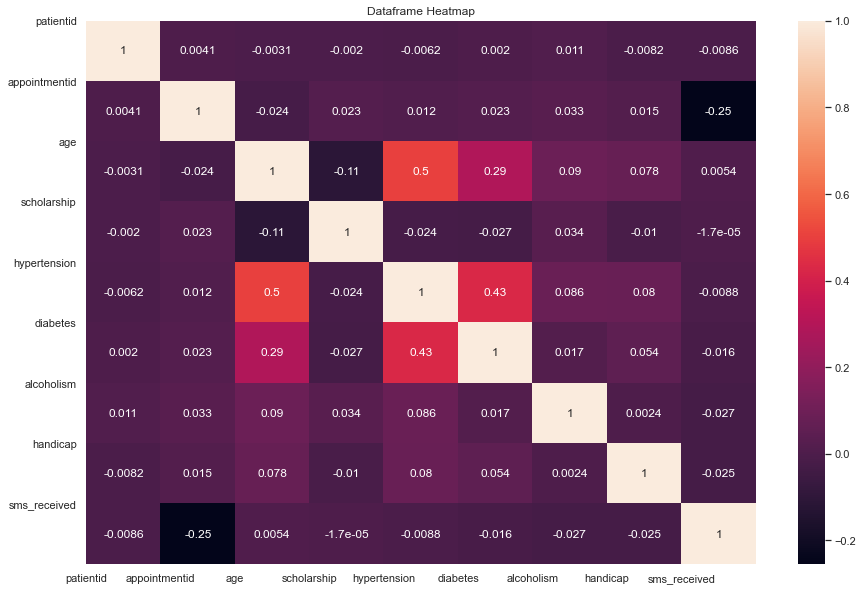

In [98]:
#check variables correlation
corr = df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, ax=ax, annot=True)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.set_title('Dataframe Heatmap')

In [51]:
df_clean.shape

(106783, 14)

In [52]:
# Establishing two dataframes, one with the patients who attended and those who did not
df_show = df_clean.query ("show == 'Yes'")
df_no_show = df_clean.query("show =='No'")

<a id='eda'></a>
# Exploratory Data Analysis

### First: 
Determinate the percentage of attendees and non-attendants in total

Text(0.5, 1.0, "Percentage of the people who shown and didn't shown for their appointments")

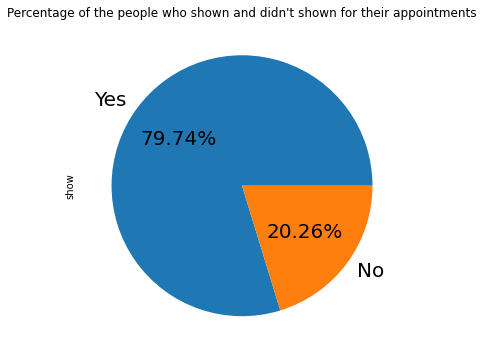

In [53]:
df_clean['show'].value_counts().plot(kind='pie', figsize=(6, 6),autopct='%.2f%%',fontsize=20);
plt.title("Percentage of the people who shown and didn't shown for their appointments")

**Finding**: From the previous graph it can be inferred, almost 80% of patients attend their medical appointments

# Questions
## 1. Is alcoholism a prominent factor in patient's absences? 

In [54]:
df_chro_con = df_clean.copy()

In [55]:
df_chro_con.drop(columns=['patientid','appointmentid','gender','scheduledday','appointmentday','age','neighbourhood','scholarship','sms_received'], inplace=True)

In [56]:
df_group = df_chro_con.groupby(['show']).sum()
df_group

,hypertension,diabetes,alcoholism,handicap
show,,,,
No,3748,1422,675,364
Yes,17968,6478,2677,1675


In [57]:
df_group_trasp = df_group.transpose()
df_group_trasp

show,No,Yes
hypertension,3748,17968
diabetes,1422,6478
alcoholism,675,2677
handicap,364,1675


Text(0, 0.5, 'Patients Quantity')

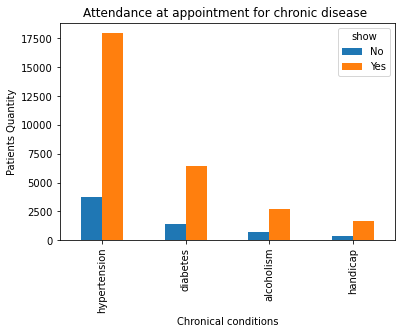

In [58]:
df_group_trasp.plot(kind='bar')
plt.title('Attendance at appointment for chronic disease ')
plt.xlabel('Chronical conditions')
plt.ylabel ('Patients Quantity')

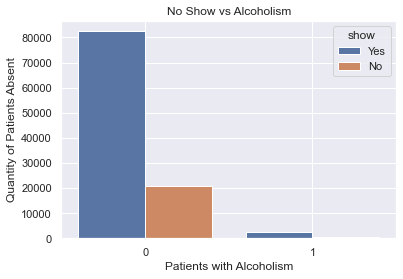

In [59]:
# plot for who showed up and not according to age group
sns.set_theme(style="darkgrid")
alc=sns.countplot(x=df_clean.alcoholism, hue=df_clean.show, data=df)
alc.set_title('No Show vs Alcoholism')
plt.grid(True)
plt.xlabel('Patients with Alcoholism')
plt.ylabel('Quantity of Patients Absent')
plt.legend
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

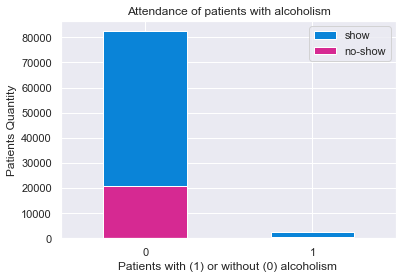

In [60]:
df_show.alcoholism.value_counts().plot(kind='bar', color='#0A84D8', label='show')
df_no_show.alcoholism.value_counts().plot(kind='bar', color='#D62992', label='no-show')
plt.legend()
plt.title('Attendance of patients with alcoholism')
plt.xlabel('Patients with (1) or without (0) alcoholism ')
plt.ylabel('Patients Quantity')
plt.xticks(rotation=0)

#### Findings

Alcoholism is not prominent factor in patient's absences. Among the chronical conditions that present more absences are patients with hypertension.

## 2. Do SMS reminders decrease the number of absences?

In [61]:
df_no_show.groupby('sms_received')['show'].count()

sms_received
0    12075
1     9559
Name: show, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

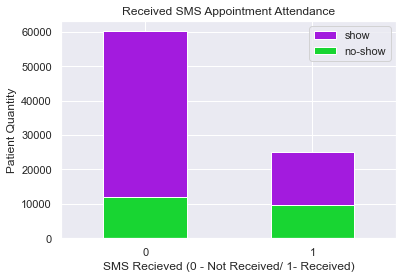

In [62]:
df_show.sms_received.value_counts().plot(kind='bar', color='#a31bde', label='show')
df_no_show.sms_received.value_counts().plot(kind='bar', color='#18D532', label='no-show')
plt.legend()
plt.title('Received SMS Appointment Attendance')
plt.xlabel("SMS Recieved (0 - Not Received/ 1- Received)")
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

Text(0, 0.5, 'Patient Quantity')

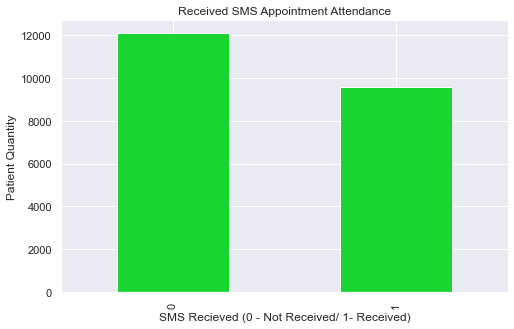

In [63]:
sms_rcvd = df_no_show.groupby('sms_received')['show'].count().plot(kind="bar",figsize=(8,5), color ='#18D532' )
sms_rcvd.set_title("Received SMS Appointment Attendance")
sms_rcvd.set_xlabel("SMS Recieved (0 - Not Received/ 1- Received)")
sms_rcvd.set_ylabel('Patient Quantity')

#### Findings: 

There is a big difference between the patients who received SMS and who did not attend the appointment and those who did not attend

## 3.	Who in terms of age misses more appointments? 

In [64]:
#create a function to age group
def agegroup (pat_age):   

    if pat_age < 10 :
        return '1–9'
    if pat_age < 20 :
        return '10–19'    
    if pat_age < 30 :
        return '20–29'  
    if pat_age < 40 :
        return '30–39' 
    if pat_age < 50 :
        return '40–49' 
    if pat_age < 60 :
        return '50–59' 
    if pat_age < 70 :
        return '60–69'   
    if pat_age < 80 :
        return '70–79'
    if pat_age < 90 :
        return '80–89'
    if pat_age < 101 :
        return '90–100'
    else:
        return '>100' 
#create a column to show age group
df_clean['age_group'] = df_clean.age.apply(agegroup)

In [65]:
group_qty = df_clean.age_group.value_counts()
group_qty

50–59     15842
30–39     15147
40–49     14189
1–9       13924
20–29     13685
10–19     12896
60–69     11858
70–79      5918
80–89      2911
90–100      406
>100          7
Name: age_group, dtype: int64

In [67]:
df_show = df_clean.query ("show == 'Yes'")
df_no_show = df_clean.query("show =='No'")

In [68]:
df_no_show.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,age_group
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,20–29


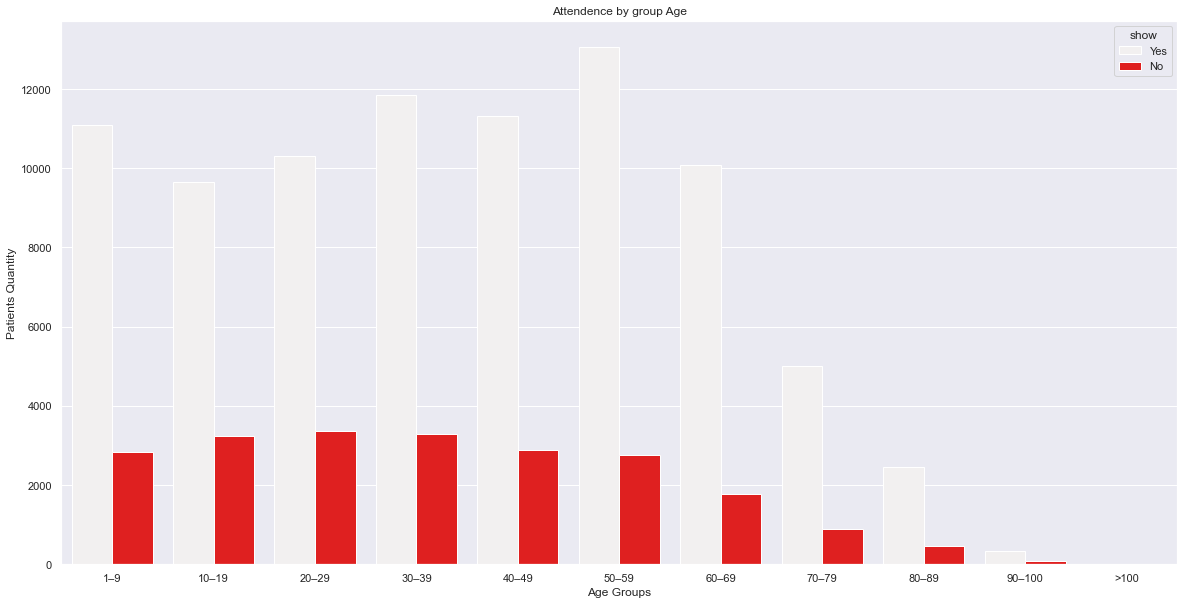

In [70]:
# plot for who showed up and not according to age group
plt.figure (figsize=(20,10))
plt_age = sns.countplot(x=df_clean['age_group'], hue=df_clean.show, data=df, color='red', order=['1–9','10–19','20–29','30–39','40–49','50–59','60–69','70–79','80–89','90–100','>100'])
plt_age.set_title('Attendence by group Age')
plt.xlabel('Age Groups')
plt.ylabel('Patients Quantity')
plt.show()

In [71]:
df_no_show[(df_no_show.age > 20)&(df_no_show.age < 29)].shape

(2693, 15)

#### Findings:

Patients between 20 and 29 years of age are the ones who miss appointments the most.

## 4.	Are no-show appointments associated with a certain gender?

In [72]:
df_clean['gender'].value_counts()

F    70006
M    36777
Name: gender, dtype: int64

In [73]:
df_clean.groupby(['gender', 'show']).count()

patientid  appointmentid  scheduledday  appointmentday    age  \
gender show                                                                  
F      No        14246          14246         14246           14246  14246   
       Yes       55760          55760         55760           55760  55760   
M      No         7388           7388          7388            7388   7388   
       Yes       29389          29389         29389           29389  29389   

             neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
gender show                                                                   
F      No            14246        14246         14246     14246       14246   
       Yes           55760        55760         55760     55760       55760   
M      No             7388         7388          7388      7388        7388   
       Yes           29389        29389         29389     29389       29389   

             handicap  sms_received  age_group  
gender show                                     
F      No       14246         14246      14246  
       Yes      55760         55760      55760  
M      No        7388          7388       7388  
       Yes      29389         29389      29389

Text(0, 0.5, 'Patient Quantity')

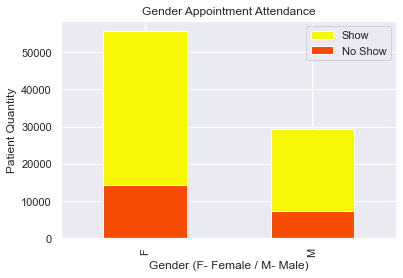

In [75]:
df_show.gender.value_counts().plot(kind='bar', color='#F7F706', label='Show')
df_no_show.gender.value_counts().plot(kind='bar', color='#F74B06', label='No Show')
plt.legend()
plt.title('Gender Appointment Attendance')
plt.xlabel('Gender (F- Female / M- Male)')
plt.ylabel('Patient Quantity')

<AxesSubplot:ylabel='Percentage of absences by gender'>

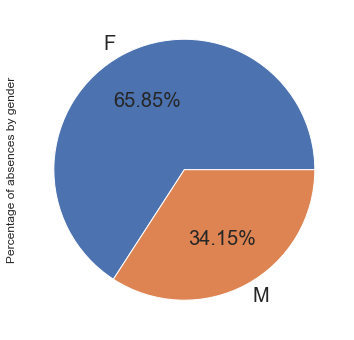

In [92]:
df_no_show['gender'].value_counts().plot(kind='pie', figsize=(6, 6),autopct='%.2f%%',fontsize=20, label ='Percentage of absences by gender')

#### Findings:

 The female gender group is the one that takes the most attendance and is the one that does not show up the most.

<a id='conclusions'></a>
## Conclusions

> **Results:** Our data suggest that: 
>
>1. Alcoholism is not prominent factor in patient's absences. Among the chronical conditions that present more absences are patients with hypertension.
>2. There is a big difference between the patients who received SMS and who did not attend the appointment and those who did not attend.
>3. Patients between 20 and 29 years of age are the ones who miss appointments the most.
>4. The female gender group is the one that takes the most attendance and is the one that does not show up the most.